# Canny Detector for edge detections

## Prepare
- Load libraries
- Load images

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
lenaSoderberg=Image.open("LenaSoderberg.jpg") # Load Image
lenaSoderberg=lenaSoderberg.convert("L") # Convert into gray scale
lenaSoderbergArr=np.array(lenaSoderberg) # Convert into numpy array

## Filter image to remove noise - Gaussian filter

In [3]:
def GaussianFilter(mu_x:float,mu_y:float,sigma_x:float,sigma_y:float,size:int):
    '''
        Generate a two variable gaussian filter $\mathcal{N}_{\mu,\sigma^2}$ of size.
        In order make the problem easy, we here firstly consider the covariance of the two variables is 0, i.e. factorized gaussian distribution. 
    '''
    x=np.arange(-(size//2),(size//2)+1) #Waring: -3//2=-2 not -1
    y=x
    xMesh,yMesh=np.meshgrid(x,y)
    gaussian2DIndependent=1/(2*np.pi*sigma_x*sigma_y)*np.exp(-1/2*(((xMesh-mu_x)/sigma_x)**2+((yMesh-mu_y)/sigma_y)**2))
    return gaussian2DIndependent
    

## Visualization of the Gaussian filter

In [4]:
def VisualizeGaussianFilter(size,filter):
    xMesh,yMesh=np.meshgrid(np.arange(-(size//2),size//2+1),np.arange(-(size//2),size//2+1))
    fig=plt.figure()
    ax=[]
    ax.append(fig.add_subplot(1,2,1))
    s=ax[0].imshow(filter)
    fig.colorbar(s)
    ax.append(fig.add_subplot(1,2,2,projection="3d"))
    s2=ax[1].plot_surface(xMesh,yMesh,filter)

In [5]:
from scipy import signal

Text(0.5, 1.0, 'Blured Graph')

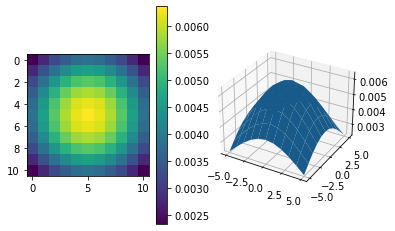

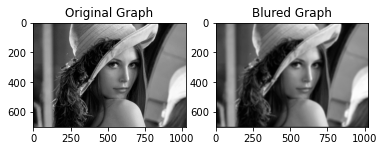

In [45]:
paramters={"size":10,"mu_x":0,"mu_y":0,"sigma_x":5,"sigma_y":5}
filter1=GaussianFilter(**paramters)
VisualizeGaussianFilter(paramters['size'],filter1);
lenaSoderbergArrConvolved=signal.convolve2d(lenaSoderbergArr,filter1,mode="same",boundary="fill",fillvalue=0)
fig2=plt.figure()
ax=np.array(fig2.subplots(1,2)).reshape(1,2)
ax[0][0].imshow(lenaSoderbergArr,cmap="gray")
ax[0][0].set_title("Original Graph")
ax[0][1].imshow(lenaSoderbergArrConvolved,cmap="gray")
ax[0][1].set_title("Blured Graph")


Text(0.5, 1.0, 'Horizontal edges soble y')

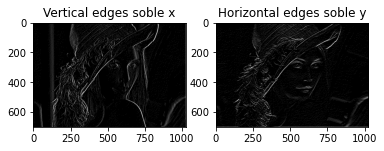

In [54]:
sobleFilter_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) # Vertical edges
sobleFilter_y=sobleFilter_x.transpose() # Horizontal edges
edge_x=signal.convolve2d(lenaSoderbergArr,sobleFilter_x,mode="same")
edge_y=signal.convolve2d(lenaSoderbergArr,sobleFilter_y,mode="same")
plt.subplot(1,2,1)
plt.imshow(Image.fromarray(edge_x).convert("1"))
plt.title("Vertical edges soble x")
plt.subplot(1,2,2)
plt.imshow(Image.fromarray(edge_y).convert("1"))
plt.title("Horizontal edges soble y")

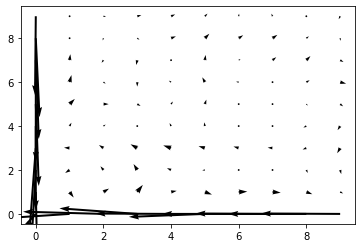

In [74]:
xMesh,yMesh=np.meshgrid(np.arange(0,lenaSoderbergArr.shape[0]),np.arange(0,lenaSoderbergArr.shape[1]),indexing="ij")
# xMesh,yMesh=np.meshgrid(np.arange(0,lenaSoderbergArr.shape[0]),np.arange(0,lenaSoderbergArr.shape[1]),indexing="xy")
plt.quiver(xMesh[0:10:,0:10:],yMesh[0:10:,0:10:],edge_x[0:10:,0:10:],edge_y[0:10:,0:10:])

In [81]:
theta=np.zeros_like(edge_x)
theta[edge_x>0]=np.arctan(edge_y[edge_x>0]/edge_x[edge_x>0])
theta=np.arctan2(edge_y,edge_x)
magnitude=np.sqrt(edge_x**2+edge_y**2)

In [86]:
hist,bin=np.histogram(theta)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-3.13952226e+00, -2.51141077e+00, -1.88329928e+00, -1.25518779e+00,
        -6.27076296e-01,  1.03519521e-03,  6.29146687e-01,  1.25725818e+00,
         1.88536967e+00,  2.51348116e+00,  3.14159265e+00]),
 <BarContainer object of 10 artists>)

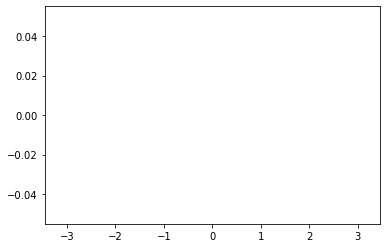

In [87]:
plt.hist()

In [89]:
hist

array([92533, 71119, 49971, 53934, 97683, 73542, 65482, 54496, 62098,
       96966], dtype=int64)